### Hamoye Stage A Data Science Internship
Hi, I am Gaurav Jain, Data Science Intern at Hamoye AI.
Following is my Stage A Exploratory Data Analysis on the fuel data set as described below.


## Fuel Data Set EDA
The data provided [here](https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv) is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [1]:
#importing useful libraries like pandas, numpy

import pandas as pd
import numpy as np

#plotting and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for missing value
import missingno as msno

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
#read the dataset and store it in 'df' variable as a Pandas DataFrame
df = pd.read_csv(url)

#describing the dataset for example its count, mean,std, etc
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


Exploring the Data

In [3]:
print("\n Data Types of columns:\n")
print(df.dtypes) #gives datatypes of all the columns in DataFrame
print("\n Top 5 values of Data Set: \n")
df.head()


 Data Types of columns:

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

 Top 5 values of Data Set: 



,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
df.nunique(axis=0)

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

### **Working for the missing values**

In [5]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

#### Percentage of missing values

In [6]:
percent_missing = sum(df.isnull().sum() * 100 / len(df))
print("Percentage of missing values: "+str(percent_missing)+" %")

Percentage of missing values: 0.6096941367747181 %


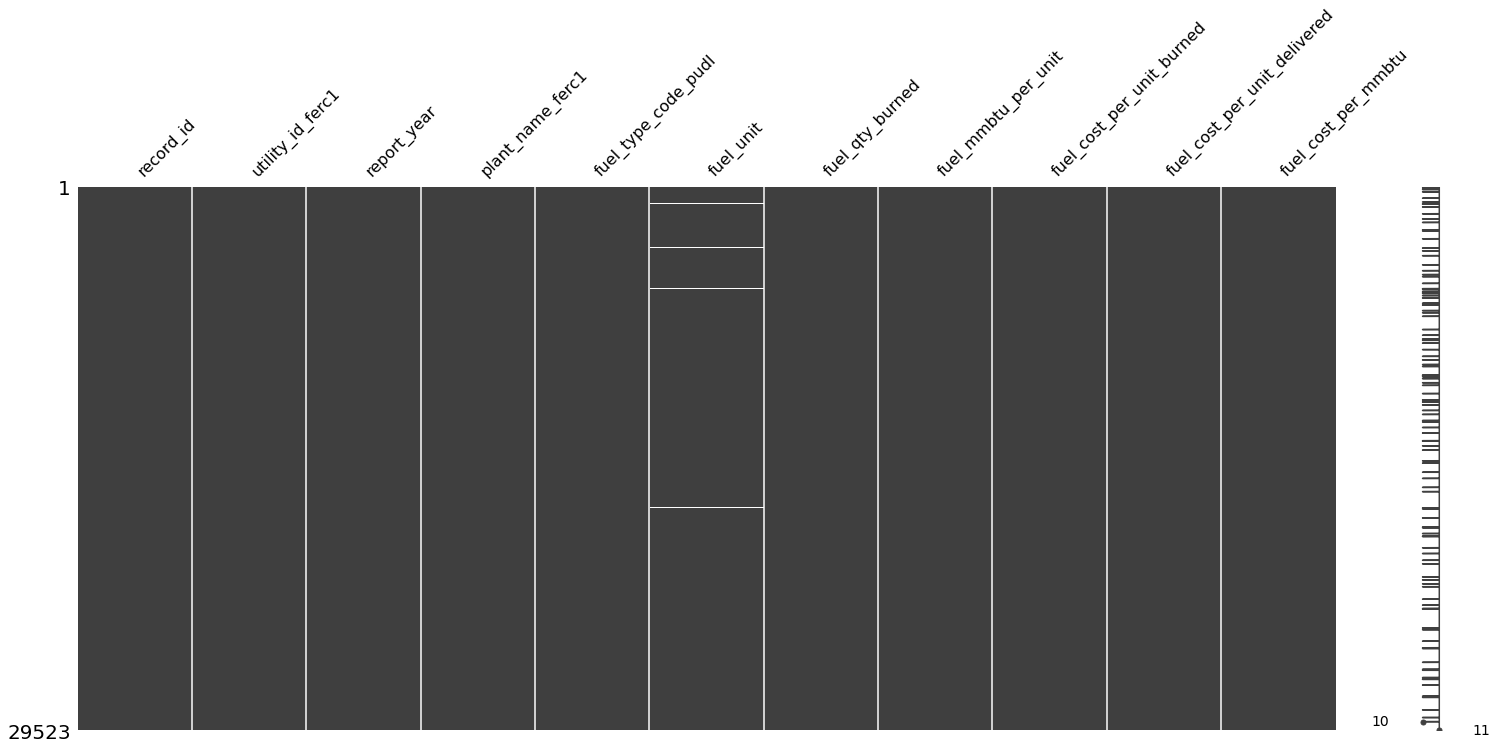

In [7]:
# Plot to show the areas where the missing values are located
msno.matrix(df)

The Horizontal lines show the position of missing data in the dataset

In [8]:
#checking the counts of fuel units for each fuel_type

df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count()

fuel_type_code_pudl  fuel_unit
coal                 bbl              1
                     mcf              5
                     mmbtu           52
                     ton           8438
gas                  bbl              2
                     mcf          11333
                     mmbtu           94
                     ton              4
nuclear              gramsU         464
                     kgU            110
                     mmbtu           34
                     mwdth           95
                     mwhth          100
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                bbl             42
                     gal              3
                     mcf              9
                     ton             77
waste                bbl              1
                     ton            436
Name: fuel_unit, dtype: int64

### Regarding filling of missing values

Here the coal has mode of fuel unit with ton, gas has mcf, nuclear has gramsU, oil has bbl, others and waste has ton as mode value for fuel unit.
<br>
I think its suitable to fill the missing values by grouping.

In [9]:
#One approach will be filling up the missing values in fuel_unit with most common unit i.e. 'mcf'
# df=df[['fuel_unit']].fillna(value='mcf')

#filling by grouping
df['fuel_unit']=df.groupby('fuel_type_code_pudl').fuel_unit.transform(lambda x:x.fillna(x.mode()[0]))

#checking wether all the null values have been filled or not
df.isnull().sum() 

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [10]:
#checking for the duplicate value

df.duplicated().any()

False

All the missing values have been filled. Also no duplicate value is there.


## **Data Visualization**

Now Working on various hidden facts of data using various visualization techniques in sns and plt

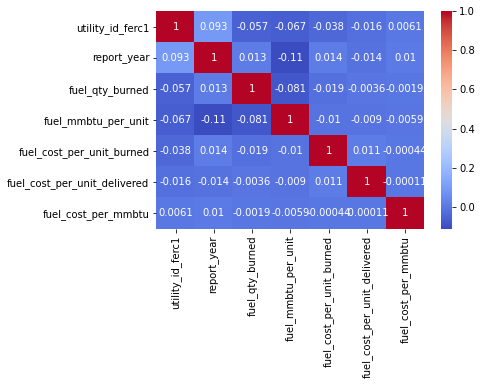

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

This map showas that there is less correlation between various fields, this might be due to some outliers. Lets try it with some sample values.

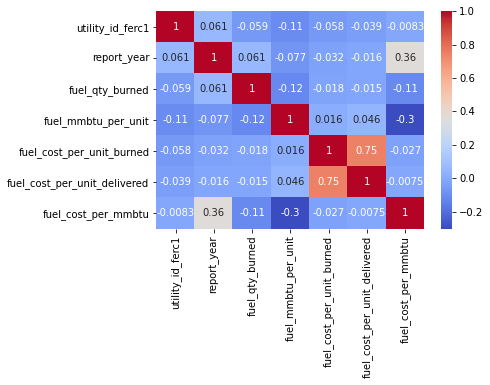

In [12]:
df_sample=df.sample(n=1000,random_state=5)
sns.heatmap(data=df_sample.corr(),cmap='coolwarm',annot=True)

Here, the correlation could be seen between few columns. This mean outliers lead to poor results earlier

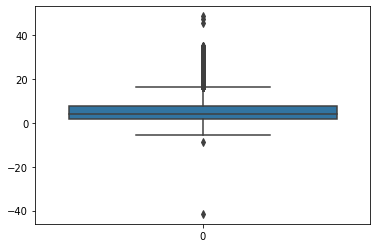

In [13]:
sns.boxplot(data=df.fuel_cost_per_mmbtu[(df['fuel_cost_per_mmbtu']<50)])
#lots of outliers :(

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

utility_id_ferc1                1.210000e+02
report_year                     1.200000e+01
fuel_qty_burned                 1.410217e+06
fuel_mmbtu_per_unit             1.598200e+01
fuel_cost_per_unit_burned       4.190600e+01
fuel_cost_per_unit_delivered    3.835850e+01
fuel_cost_per_mmbtu             5.805000e+00
dtype: float64


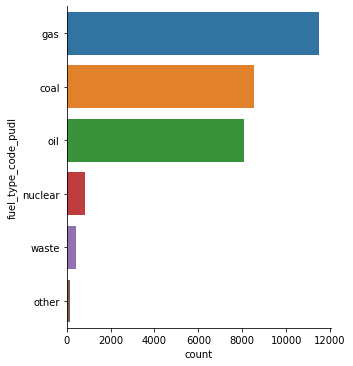

In [15]:
sns.catplot(y='fuel_type_code_pudl',kind="count",data=df,order=df['fuel_type_code_pudl'].value_counts().index)

### Most Popular Fuel
Gas, followed by coal, oil, nuclear, waste and others

### For cheapest Fuel

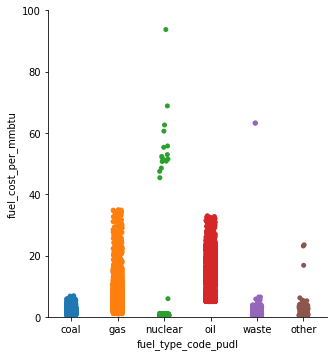

In [16]:
g=sns.catplot(x='fuel_type_code_pudl',y='fuel_cost_per_mmbtu',data=df)

# considering outlier, will set limit on cost
g.set(ylim=(0,100))

Coal has cheapest price as all others have a wide spread

### Variation over years

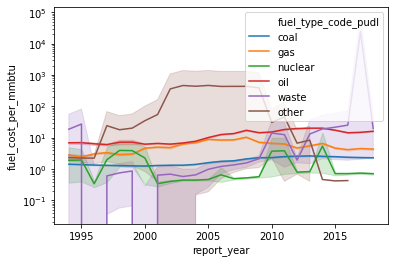

In [17]:
g=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',data=df)
g.set_yscale("log")
# plt.figure(figsize=(100,100))

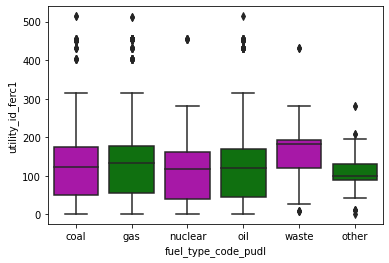

In [18]:
# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1", palette=["m", "g"], data=df)

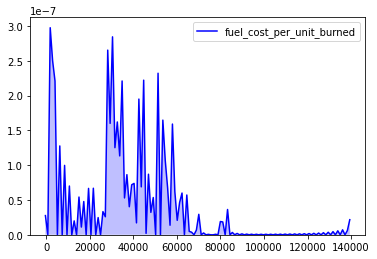

In [19]:
# KDE plot 
sns.kdeplot(df['fuel_cost_per_unit_burned'], shade=True, color="b")

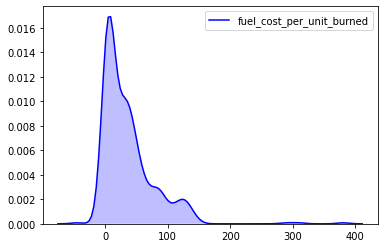

In [20]:
# KDE plot 
df_sample=df.sample(n=500,random_state=4)
sns.kdeplot(df_sample['fuel_cost_per_unit_burned'], shade=True, color="b")

### Analytical inferences of the data

In [21]:
abs(df.corrwith(df['fuel_cost_per_unit_burned'])).sort_values() #checking correlation

fuel_cost_per_mmbtu             0.000437
fuel_mmbtu_per_unit             0.010034
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_qty_burned                 0.018535
utility_id_ferc1                0.037863
fuel_cost_per_unit_burned       1.000000
dtype: float64

#### <a href="#top" style="text-decoration:none;"><i>Back to Top</i></a>
<hr style="width:100%; height:1px; background: #000">